## Wolfe-Quapp potential


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#set bigger font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)   # fontsize of the figure title

#set palette
try:
    import fessa
    plt.set_cmap('fessa')
except:
    pass

<Figure size 432x288 with 0 Axes>

In [3]:
#original Wolfe-Quapp potential
def WolfeQuapp(x, y, theta=0, scale=1):
    if theta == 0:
        ene = x**4 + y**4 - 2 * x**2 - 4 * y**2 + x * y + 0.3 * x + 0.1 * y
        shift = 6.76
        return scale * (ene + shift)
    else:
        c=np.cos(theta)
        s=np.sin(theta) 
        return WolfeQuapp(c*x-s*y, s*x+c*y, theta=0, scale=scale)

In [4]:
#modified Wolfe-Quapp potential (used in all our previous papers)
def WolfeQuapp2(x, y, theta=-0.6*np.pi/4, scale=2):
    if theta == 0:
        ene = x**4 + y**4 - 2 * x**2 - 4 * y**2 + 2 * x * y + 0.8 * x + 0.1 * y
        shift = 9.28
        return scale * (ene + shift)
    else:
        c=np.cos(theta)
        s=np.sin(theta) 
        return WolfeQuapp2(c*x-s*y, s*x+c*y, theta=0, scale=scale)

In [5]:
nbins = 101
x_bins = np.linspace(-3., 3., nbins)
y_bins = x_bins
X, Y = np.meshgrid(x_bins,y_bins)

FES = np.zeros(len(x_bins))
for i,x in enumerate(x_bins):
    FES[i] = -np.logaddexp.reduce(-np.array([WolfeQuapp2(x,y) for y in y_bins]))
FES -= min(FES)

# biased model
gamma = 10
bias = - (1 - 1 / gamma) * FES
def biasedWolfeQuapp2(x, y, theta=0, bias=bias, x_bins=x_bins):
    return WolfeQuapp2(x, y, theta) + np.interp(x, x_bins, bias)

levels = np.linspace(0,20,9)
def plot_2Dpotential(ax, pot, label, let, **kwargs):
    Z = pot(X, Y, **kwargs)
    ct = ax.contourf(X, Y, Z-np.amin(Z), levels=levels)
    cb = plt.colorbar(ct, ticks=levels[::2], ax=ax)
    cb.set_label(label)
    ax.set_box_aspect(1)
    ax.set_xlim(x_bins[0], x_bins[-1])
    ax.set_ylim(y_bins[0], y_bins[-1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    # ax.set_yticks(np.arange(0,2.1,.5))
    ax.grid(linestyle='dashed')
    ax.text(0.85, 0.9, let, transform=ax.transAxes)

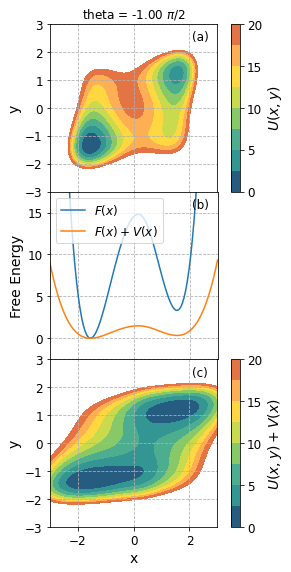

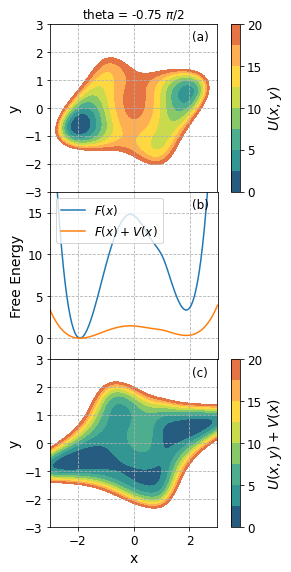

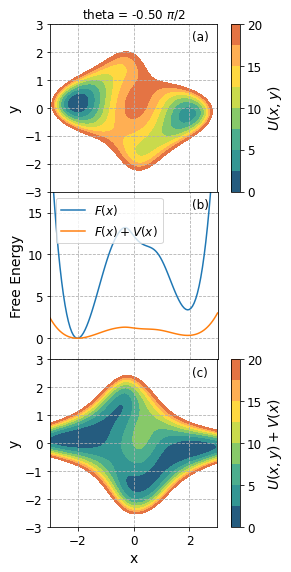

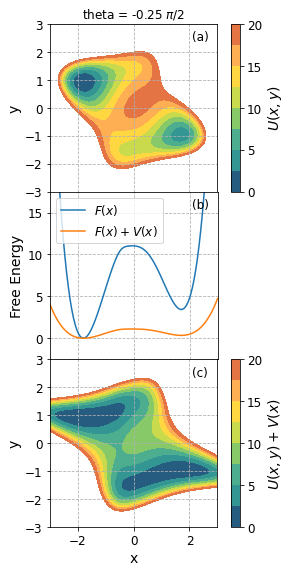

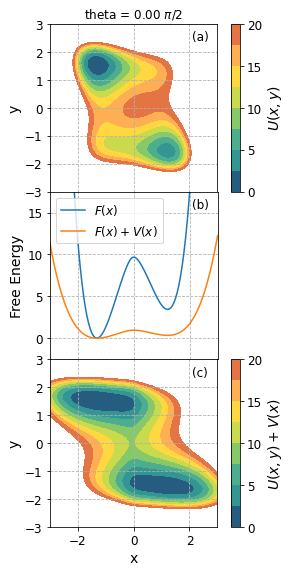

In [10]:
RUN_GIF = False

barriers = []
deltaFs = []
n_frames = 5
if RUN_GIF:
    n_frames = 30
thetas = np.linspace(-np.pi/2, 0, n_frames)
for theta in thetas:
    for i,x in enumerate(x_bins):
        FES[i] = -np.logaddexp.reduce(-np.array([WolfeQuapp2(x,y,theta) for y in y_bins]))
    FES -= np.amin(FES)
    bias = - (1 - 1 / gamma) * FES   
    barriers.append(max([FES[len(FES)//4+i] for i in range(len(FES)//2)]))
    deltaFs.append(np.logaddexp.reduce(-FES[:len(FES)//2])-np.logaddexp.reduce(-FES[len(FES)//2:]))
    
    fig = plt.figure()
    fig.set_size_inches((5, 9.25))
    gs = fig.add_gridspec(3, hspace=0)
    axs = gs.subplots(sharex=True, sharey=False)
    axs[0].set_title(f'theta = {theta/np.pi*2:.2f} $\pi/2$')

    plot_2Dpotential(axs[0], WolfeQuapp2, '$U(x,y)$', '(a)', theta=theta)
    
    axs[1].plot(x_bins, FES, label='$F(x)$')
    axs[1].plot(x_bins, FES/gamma, label='$F(x) + V(x)$')
    axs[1].set_box_aspect(1)
    axs[1].set_xlim(x_bins[0], x_bins[-1])
    axs[1].set_ylim(-2.5, 17.5)
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('Free Energy')
    axs[1].legend(loc='upper left')
    axs[1].grid(linestyle='dashed')
    axs[1].text(0.85, 0.9, '(b)', transform=axs[1].transAxes)

    plot_2Dpotential(axs[2], biasedWolfeQuapp2, '$U(x,y) + V(x)$', '(c)', theta=theta, bias=bias)

    plt.show()
    if RUN_GIF:
        clear_output(wait=True)

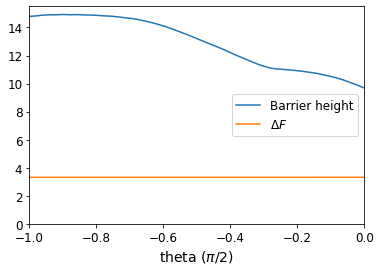

In [7]:
plt.plot(thetas/np.pi*2, barriers, label='Barrier height')
plt.plot(thetas/np.pi*2, deltaFs, label='$\Delta F$')
plt.ylim(0, None)
plt.xlim(-1,0)
plt.legend()
plt.xlabel('theta ($\pi/2$)')
plt.show()

The barrier height changes considerably, while the $\Delta F$ remains almost identical.

For simplicity, here instead of changing the CV we rotate the potential, but the effect is idential.
theta = -1 $\pi/2$ corresponds to biasing $y$, while theta = 0 to biasing $x$.

In the following we show the unrotated potentila (theta=0) with lines corresponding to the CV that is enhanced, from full black (y), to more and more transparent (x)

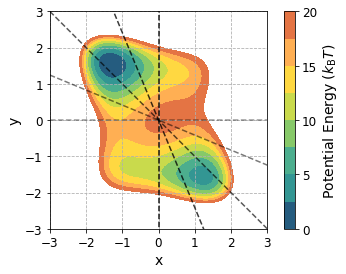

In [11]:
fig, ax = plt.subplots()
plot_2Dpotential(ax, WolfeQuapp2, 'Potential Energy ($k_\mathrm{B}T$)', '', theta=0)
for theta in thetas:
    ax.plot(x_bins, np.tan(theta)*x_bins, c='black', linestyle='dashed', alpha=0.4-theta/np.pi)
plt.show()